Daniela Quijano
Machine Learning NYU

The purpose of this notebook is to implement decision trees and random orest ML algorithms in order to predict the label (malignant/benign) from features drawn from mages of 'fine needle aspirate (FNA) of a breast mass'. Data comes from https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import GridSearchCV

from sklearn import tree
from sklearn.tree import plot_tree

from sklearn.datasets import make_classification


In [2]:
data= pd.read_csv('/Users/danielaquijano/Documents/GitHub/Machine-Learning-Course-Projects/sourcefiles/wdbc.data')

In [3]:
data


,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
564,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
565,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
566,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


From dataset documentation:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry 
j) fractal dimension ("coastline approximation" - 1)

Several of the papers listed above contain detailed descriptions of
how these features are computed. 

The mean, standard error, and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features.  For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.


In [4]:
#Trim data to only contain features a through j listed above 

data=data.iloc[:,0:12]
data.head()

,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613


In [5]:
#Name the columns with names a-j in list above
data.columns = ['ID', 'Diagnosis', 'Radius','Texture', 'Perimeter', 'Area', 'Smoothness', 'Compactness', 'Concavity', 'Concave Points', 'Symmetry', 'Fractal Dimension']
data

,ID,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Concave Points,Symmetry,Fractal Dimension
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613
...,...,...,...,...,...,...,...,...,...,...,...,...
563,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
564,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
565,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
566,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


In [6]:
#All of the columns have the same number of entries, no null entries. 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 568 non-null    int64  
 1   Diagnosis          568 non-null    object 
 2   Radius             568 non-null    float64
 3   Texture            568 non-null    float64
 4   Perimeter          568 non-null    float64
 5   Area               568 non-null    float64
 6   Smoothness         568 non-null    float64
 7   Compactness        568 non-null    float64
 8   Concavity          568 non-null    float64
 9   Concave Points     568 non-null    float64
 10  Symmetry           568 non-null    float64
 11  Fractal Dimension  568 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 53.4+ KB


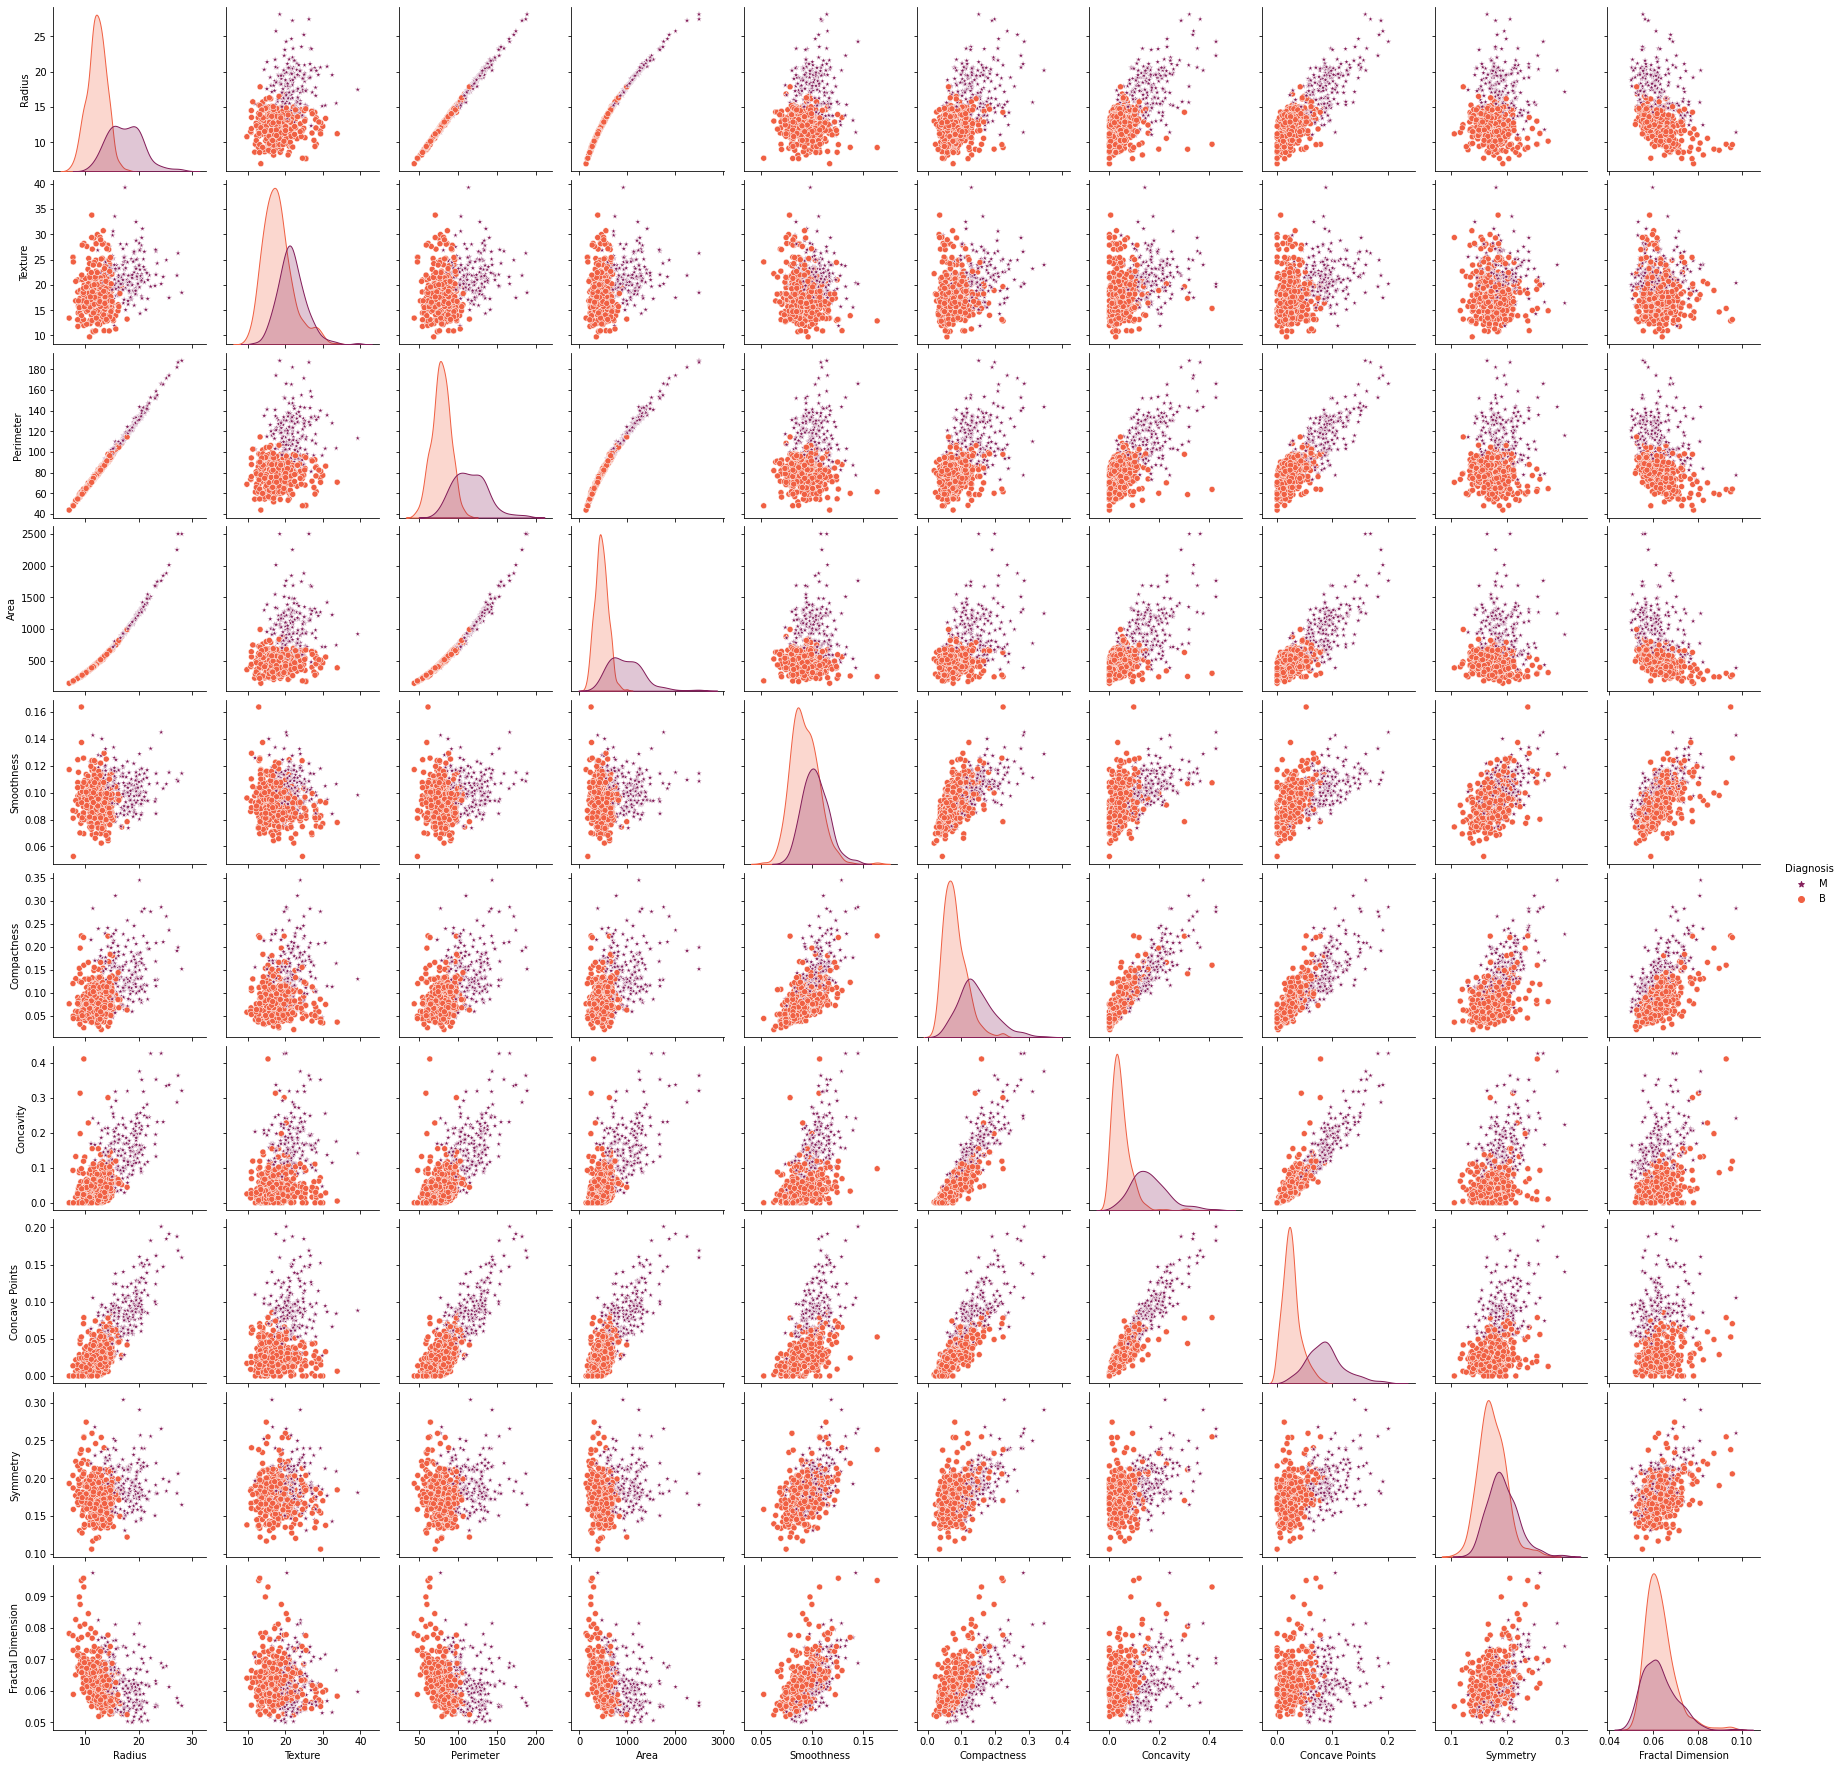

In [7]:
#Visualize Data
#plot=sns.pairplot(data['Diagnosis', 'Radius','Texture', 'Perimeter', 'Area', 'Smoothness', 'Compactness', 'Concavity', 'Concave Points', 'Symmetry', 'Fractal Dimension'], hue='Diagnosis', palette='rocket')
plot=sns.pairplot(data, vars = data.columns[2:12], hue ="Diagnosis", markers=["*", "o"], palette='rocket')
plot

With the paiplot we can see that pairwise features do show clusters for diagnosis categories. 

# Decision Tree Classifier

### Part 1: Using the Scikit-Learn Library train the Decision Tree Classifier 

In [103]:
#Train, test split data. Test size 20% of data 

X = data.drop('Diagnosis',axis=1)
y = data['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


In [54]:
dec_tree= DecisionTreeClassifier()
dec_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [55]:
predictions_DT = dec_tree.predict(X_test)

As shown below, the decision tree is able to predict the Diagnosis to 90% accuracy

In [56]:
print(classification_report(y_test,predictions_DT))

              precision    recall  f1-score   support

           B       0.92      0.89      0.90        62
           M       0.87      0.90      0.89        52

    accuracy                           0.89       114
   macro avg       0.89      0.90      0.89       114
weighted avg       0.90      0.89      0.89       114



### Part 2: Grid Search method to run the model for trees of depth 1:6 and for Gini Impurity and Entropy impurity 

In [59]:
parameter_tuning={
    'criterion':['gini', 'entropy'],
    'max_depth':range(1,6)
}

In [60]:
grid_DT=GridSearchCV(dec_tree,
                     param_grid=parameter_tuning
                    )

In [61]:
grid_DT.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 6)})

In [63]:
grid_DT.best_params_

{'criterion': 'gini', 'max_depth': 3}

In [64]:
grid_DT.best_estimator_

DecisionTreeClassifier(max_depth=3)

In [69]:
grid_DT.best_score_

0.9360927960927962

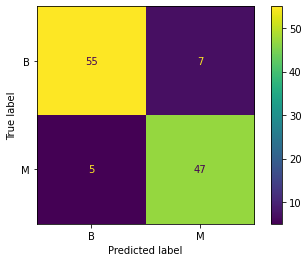

In [93]:
#Plot confusion matrix for the best parameters found in the grid search 
plot_confusion_matrix(dec_tree_optimized, X_test,y_test)

### Part 3: Visualize Best Model  (with plot.tree() )

In [79]:
dec_tree_optimized= DecisionTreeClassifier(max_depth=3)

In [80]:
dec_tree_optimized.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

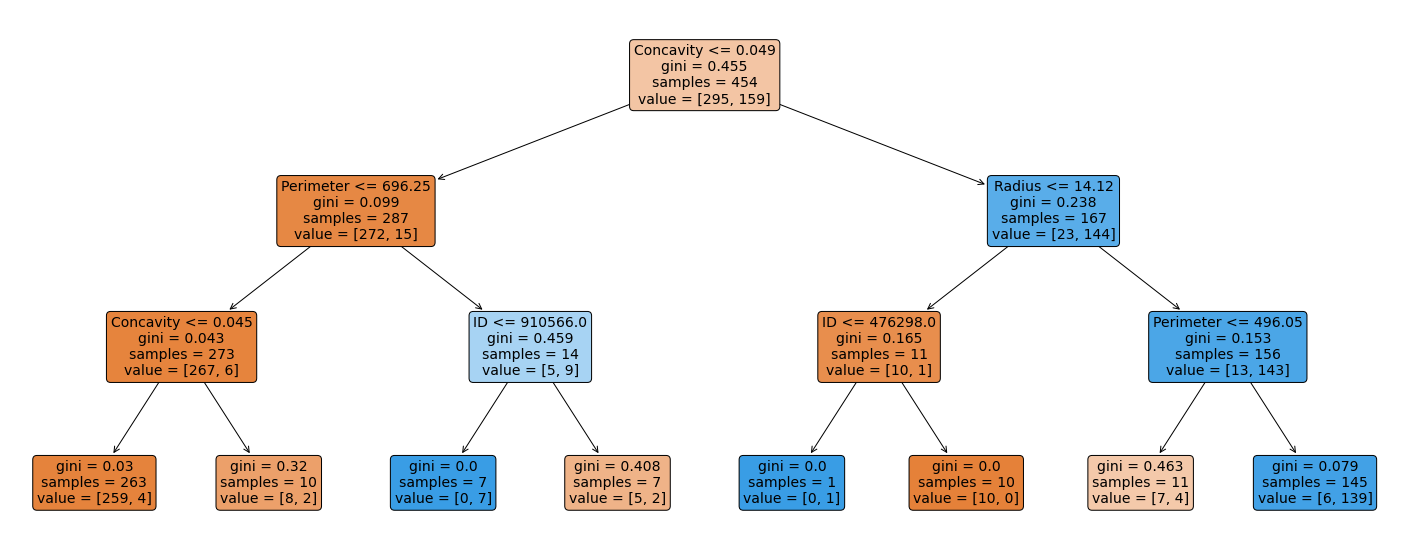

In [85]:
plt.figure(figsize=(25,10))
a = plot_tree(dec_tree_optimized,  
              feature_names = data.columns, 
              filled=True, 
              rounded=True, 
              fontsize=14)

### Part 4: Use Adaboost to improve the model and evaluate the performance using the test set.

In [128]:
#Implement adaboost classifier, use optmized conditions from Decision tree above, fit model and inspectaccuracy metrics
Ada_model=AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=3)
)

In [129]:
Ada_model.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3))

In [130]:
Ada_predict=Ada_model.predict(X_test)

In [134]:
#The model accuracy improves to 98% when implementing Adaboost, only 2 misclassified instances

In [131]:
print(classification_report(y_test,Ada_predict))

              precision    recall  f1-score   support

           B       0.97      1.00      0.99        70
           M       1.00      0.95      0.98        44

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



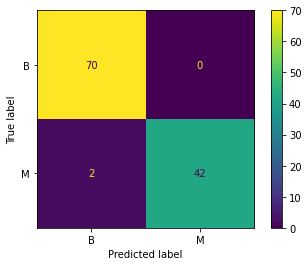

In [133]:
plot_confusion_matrix(Ada_model, X_test,y_test)

# Random Forest Classifier 

### Part 1: Using the Scikit-Learn Library train the Random Forest Classifier 

In [104]:
Rand_Forest = RandomForestClassifier(oob_score = True)
Rand_Forest.fit(X_train,y_train)

RandomForestClassifier(oob_score=True)

In [105]:
predictions_RF = Rand_Forest.predict(X_test)

As seen below the random forest model is able to corresctly classify 96% of the samples.

In [106]:
print(classification_report(y_test,predictions_RF ))

              precision    recall  f1-score   support

           B       0.95      0.99      0.97        70
           M       0.98      0.91      0.94        44

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



### Part 2: Use the Grid Search method to run the model for trees of depth 1, 2, 3, 4, 5, and 6 and for the
### Gini Impurity and Entropy impurity measures. Also set the parameter so it will use the "outof-bag" samples for calculating accuracy.
### Part 3: Test model accuracy

In [107]:
#Set parameters for grid search cross validation
parameter_tuning_rf={
    'criterion':['gini', 'entropy'],
    'max_depth':range(1,6), 
}

In [116]:
#Make a grid search with set parameters to find the best combination
grid_RF=GridSearchCV(Rand_Forest,
                     param_grid=parameter_tuning_rf
                    )


In [117]:
grid_RF.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(oob_score=True),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 6)})

The best parameters consisted of the gini measure and the max depth at 5. See below for best parameters. Best score was 93% accuracy

In [118]:
grid_RF.best_params_

{'criterion': 'gini', 'max_depth': 5}

In [119]:
grid_RF.best_estimator_

RandomForestClassifier(max_depth=5, oob_score=True)

In [120]:
grid_RF.best_score_

0.9361172161172162

In [121]:
RF_optimized=RandomForestClassifier(max_depth=5, oob_score=True)

In [124]:
RF_optimized.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, oob_score=True)

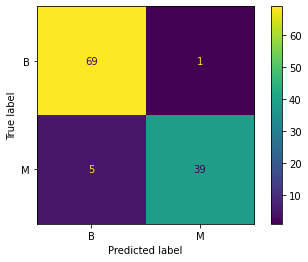

In [125]:
plot_confusion_matrix(RF_optimized, X_test,y_test)

The highest accuracy was obtained from the decsion tree with adaboost. 